In [1]:
library("ggplot2")
library("reshape2")
library("plyr")
library("RPostgreSQL")
library("ggmap")


Loading required package: DBI


In [2]:
options(scipen=1000000000)

In [3]:
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname="pensa_geo",host="10.70.50.140",port=5432,user="gpadmin",password="changeme")


META-Analise

In [5]:
#total de pares
total_pares <- dbGetQuery(con, "SELECT count(*) FROM pensa_est_ghg.onibus_calculos")
total_pares    
#1246518993   --1.2 b  --ghg_gps
#1957279391   --1.9 b  --onibus_calculos

count
1 1957279391

In [8]:
pares_pordia[pares_pordia$count==max(pares_pordia$count),]

dia   count
713 2015-11-24 5154247

'data.frame':	833 obs. of  2 variables:
 $ dia  : POSIXct, format: "2013-09-26 00:00:00" "2013-09-27 00:00:00" ...
 $ count: num  221367 368847 567151 59969 393180 ...


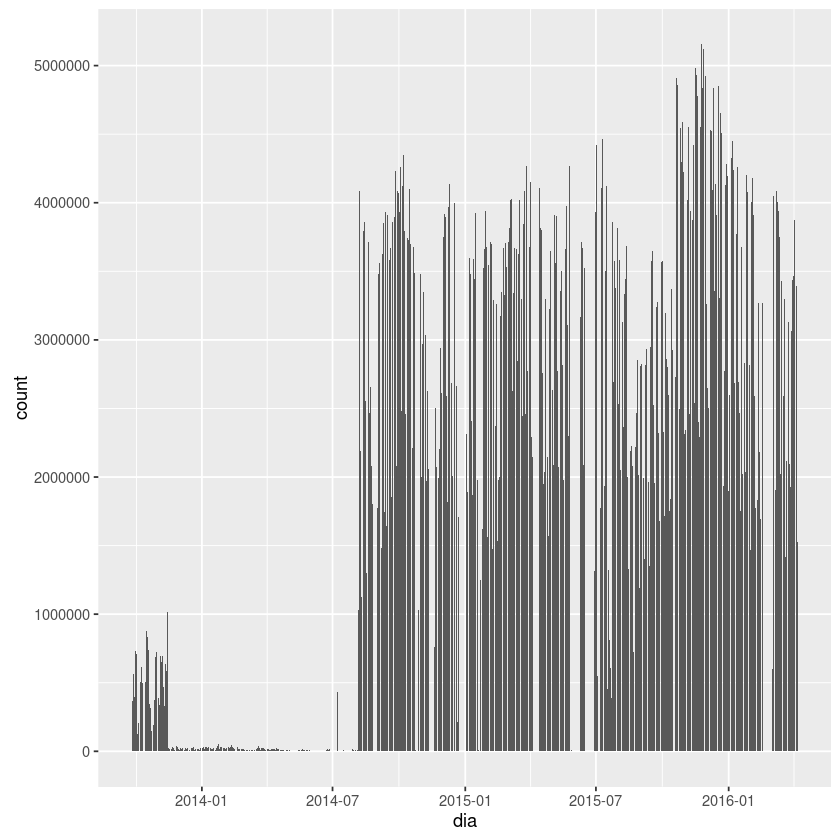

In [4]:
#total de pares por dia - levanta dados
pares_pordia <- dbGetQuery(con,
"SELECT date_trunc('day', datahora_01) dia,
    count(*)
FROM pensa_est_ghg.onibus_calculos
WHERE velocidade_calculada > 1 AND velocidade_calculada < 120
GROUP BY 1
ORDER BY date_trunc('day', datahora_01)")

#total de pares por dia - analisa distribuicao
str(pares_pordia)

ggplot(pares_pordia, aes(x=dia, y=count))+geom_bar(stat="identity")

'data.frame':	657 obs. of  6 variables:
 $ dia             : POSIXct, format: "2013-09-26 00:00:00" "2013-09-27 00:00:00" ...
 $ count           : num  221367 368847 567151 59969 393180 ...
 $ velocidade_media: num  18.7 19.4 23 28 20.2 ...
 $ km_rodados      : num  155934 268484 454988 56485 299772 ...
 $ cons_litros     : num  69673 118092 188251 21249 130429 ...
 $ co2e_ton        : num  171.4 290.6 463.7 52.4 321.2 ...


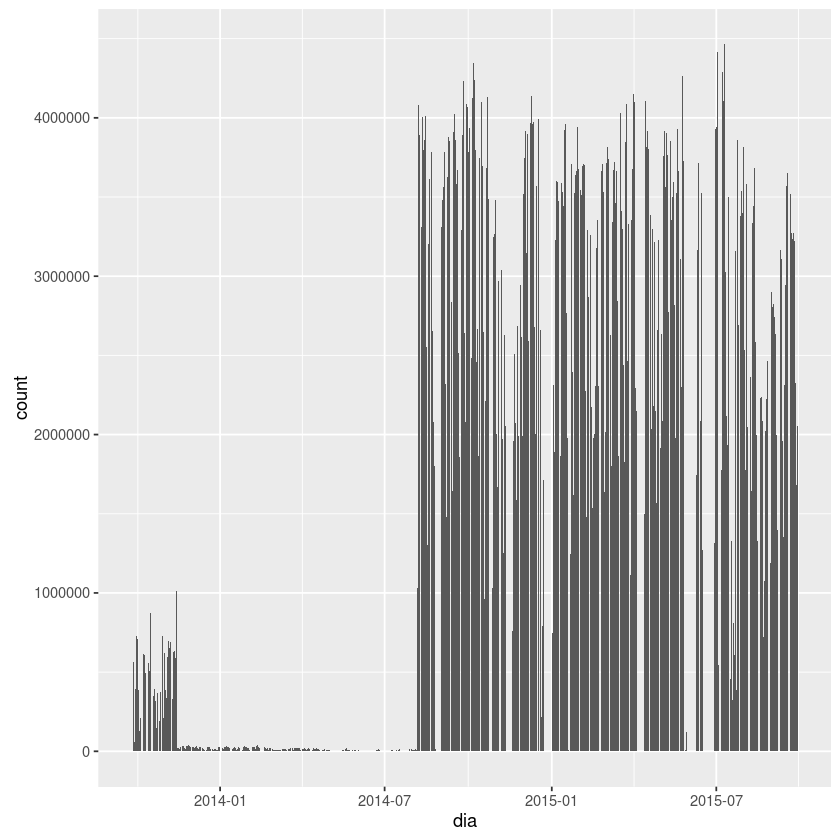

In [10]:
####nao tou usando isso agorad
#total de pares por dia - levanta dados
pares_pordia <- dbGetQuery(con,
"SELECT date_trunc('day', datahora_01) dia,
    count(*),
    avg(velocidade) velocidade_media,
    sum(d) km_rodados,
    sum(cons_litros) cons_litros,
    sum(co2e_ton) co2e_ton
FROM pensa_est_ghg.ghg_gps_old
WHERE velocidade_calculada > 1 AND velocidade_calculada < 120
GROUP BY 1
ORDER BY date_trunc('day', datahora_01)")

#total de pares por dia - analisa distribuicao
str(pares_pordia)

ggplot(pares_pordia, aes(x=dia, y=count))+geom_bar(stat="identity")

'data.frame':	657 obs. of  6 variables:
 $ dia             : POSIXct, format: "2013-09-26 00:00:00" "2013-09-27 00:00:00" ...
 $ count           : num  221367 368847 567151 59969 393180 ...
 $ velocidade_media: num  18.7 19.4 23 28 20.2 ...
 $ km_rodados      : num  155934 268484 454988 56485 299772 ...
 $ cons_litros     : num  69673 118092 188251 21249 130429 ...
 $ co2e_ton        : num  171.4 290.6 463.7 52.4 321.2 ...


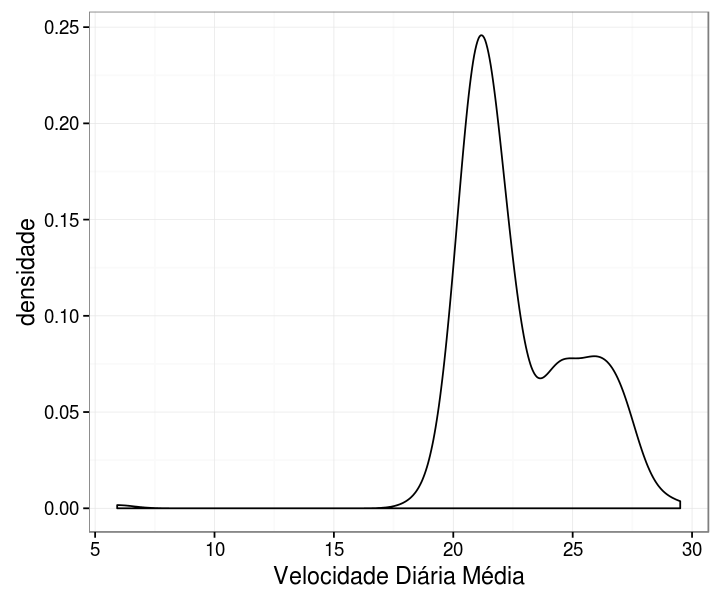

In [31]:
str(pares_pordia)
ggplot(pares_pordia[pares_pordia$dia>"2014-09-01 00:00:00" & pares_pordia$dia<"2016-01-31 23:59:59",], aes(velocidade_media), group=)+ geom_density()+
xlab("Velocidade Diária Média") + ylab("densidade")+
theme_bw(base_size=14, base_family="Helvetica")

#ggplot(pares_pordia[pares_pordia$dia>"2014-09-01 BRT" & pares_pordia$dia<"2016-01-31 BRT",], aes(velocidade_calculada))+
#geom_density()
#xlab("data") + ylab("número de registros")+
#theme_bw(base_size=14, base_family="Helvetica")

ERROR: Error in eval(expr, envir, enclos): object 'velocidade_calculada' not found


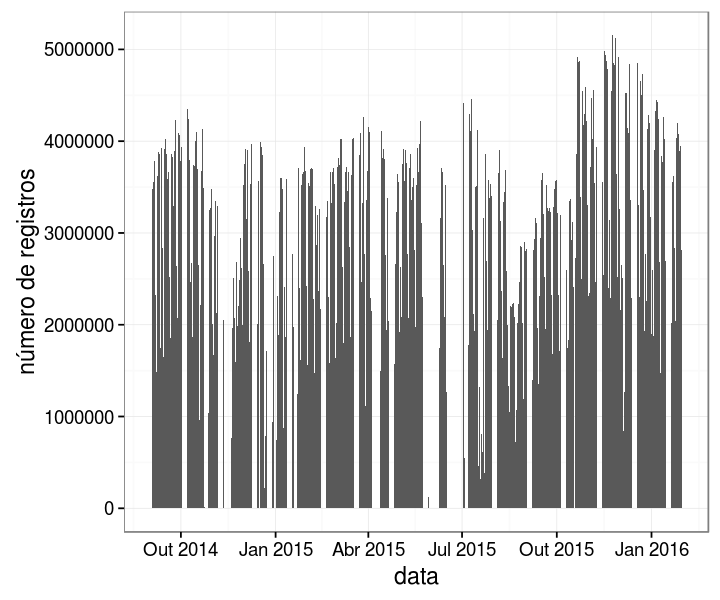

ERROR: Error in file(con, "rb"): cannot open the connection


ERROR: Error in file(con, "rb"): cannot open the connection


ERROR: Error in file(con, "rb"): cannot open the connection


ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [20]:
#pares_pordia[pares_pordia$dia=="2014-08-06 BRT",]$count

ggplot(pares_pordia[pares_pordia$dia>"2014-09-01 BRT" & pares_pordia$dia<"2016-01-31 BRT",], aes(x=dia, y=count))+
geom_bar(stat="identity")+
xlab("data") + ylab("número de registros")+
theme_bw(base_size=14, base_family="Helvetica")




[1] "2013-09-26 BRT"

[1] "2016-04-05 BRT"

[1] 1030679

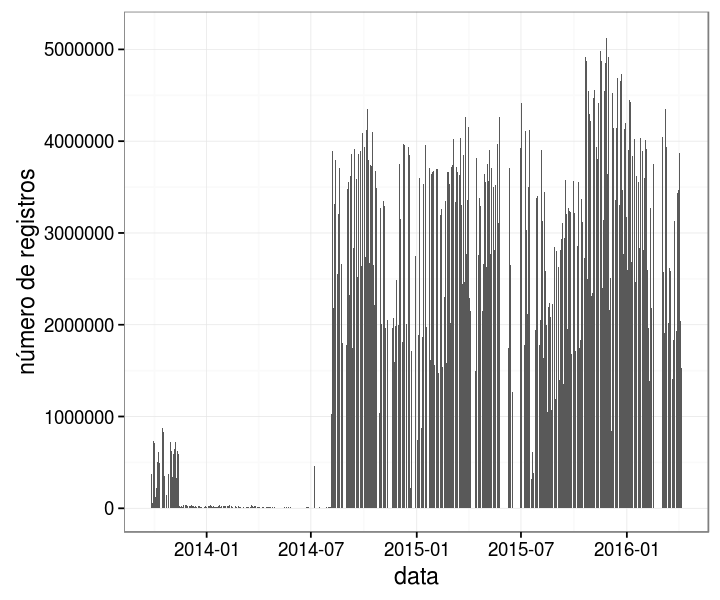

In [15]:
options(repr.plot.width=3, repr.plot.height=2)


min(pares_pordia$dia)
max(pares_pordia$dia)

pares_pordia[pares_pordia$dia=="2014-08-06 BRT",]$count


options(repr.plot.width=6, repr.plot.height=5)

rect <- data.frame(xmin='2014-08-01 00:00:0', xmax='2015-10-26 00:00:00', ymin=-Inf, ymax=Inf)

ggplot(pares_pordia, aes(x=dia, y=count))+geom_bar(stat="identity") + 
xlab("data") + ylab("número de registros")+
#geom_rect(data=rect, aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax), color="grey20", alpha=0.5, inherit.aes = FALSE) +
theme_bw(base_size=14, base_family="Helvetica")

In [9]:
ggplot(pares_pordia, aes(count))+geom_density()

ggplot(pares_pordia[pares_pordia$count>2000000,], aes(count))+geom_density()



ERROR: Error in ggplot(pares_pordia, aes(count)): object 'pares_pordia' not found


ERROR: Error in ggplot(pares_pordia[pares_pordia$count > 2000000, ], aes(count)): object 'pares_pordia' not found


'data.frame':	657 obs. of  6 variables:
 $ dia             : POSIXct, format: "2013-09-26 00:00:00" "2013-09-27 00:00:00" ...
 $ count           : num  221367 368847 567151 59969 393180 ...
 $ velocidade_media: num  18.7 19.4 23 28 20.2 ...
 $ km_rodados      : num  155934 268484 454988 56485 299772 ...
 $ cons_litros     : num  69673 118092 188251 21249 130429 ...
 $ co2e_ton        : num  171.4 290.6 463.7 52.4 321.2 ...
'data.frame':	280 obs. of  6 variables:
 $ dia             : POSIXct, format: "2014-08-07" "2014-08-08" ...
 $ count           : num  4084078 3892935 2187098 3313861 4006918 ...
 $ velocidade_media: num  21.3 20.9 24.5 21.9 21.7 ...
 $ km_rodados      : num  1501502 1415180 926933 1253944 1500716 ...
 $ cons_litros     : num  618509 587054 364073 515182 616324 ...
 $ co2e_ton        : num  1494 1418 882 1246 1490 ...


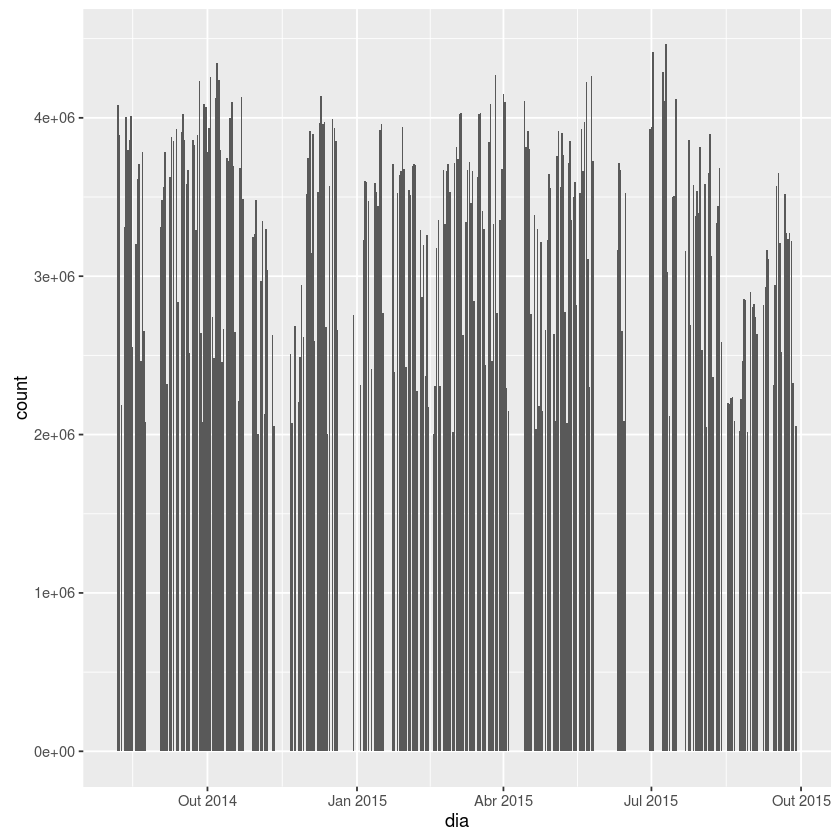

In [24]:
str(pares_pordia)
ggplot(pares_pordia[pares_pordia$count>2000000,], aes(x=dia, y=count))+geom_bar(stat="identity")

d <- pares_pordia[pares_pordia$count>2000000,]
str(d)

In [23]:
str(d)
v <- round(d$dia, units = c("hours"))
str(v)

'data.frame':	280 obs. of  6 variables:
 $ dia             : POSIXct, format: "2014-08-07" "2014-08-08" ...
 $ count           : num  4084078 3892935 2187098 3313861 4006918 ...
 $ velocidade_media: num  21.3 20.9 24.5 21.9 21.7 ...
 $ km_rodados      : num  1501502 1415180 926933 1253944 1500716 ...
 $ cons_litros     : num  618509 587054 364073 515182 616324 ...
 $ co2e_ton        : num  1494 1418 882 1246 1490 ...
 POSIXlt[1:280], format: "2014-08-07" "2014-08-08" "2014-08-09" "2014-08-11" ...


Overall

In [ ]:
orverall <- dbGetQuery(con, "SELECT * FROM pensa_est_ghg.ghg_gps_relatorio")

PERFIS

In [ ]:
#por dia da semana

In [49]:
dow <- dbGetQuery(con, "SELECT date_part('dow', datahora_01) dow,
    count(*),
    avg(velocidade) velocidade_media,
    sum(d) km_rodados,
    sum(cons_litros) cons_litros,
    sum(co2e_ton) co2e_ton
FROM pensa_est_ghg.ghg_gps_relatorio
WHERE velocidade_calculada > 1 AND velocidade_calculada < 120 AND date_trunc('day', datahora_01) > 2000000
GROUP BY 1
ORDER BY date_part('dow', datahora_01)")

In [59]:
dow$diasemana[dow$dow==0] <- 'dom'
dow$diasemana[dow$dow==1] <- 'seg'
dow$diasemana[dow$dow==2] <- 'ter'
dow$diasemana[dow$dow==3] <- 'qua'
dow$diasemana[dow$dow==4] <- 'qui'
dow$diasemana[dow$dow==5] <- 'sex'
dow$diasemana[dow$dow==6] <- 'sab'

dow$diasemana <- reorder(dow$diasemana, dow$dow)

In [56]:
dow

dow     count velocidade_media km_rodados cons_litros co2e_ton diasemana
1   0 111421635         26.37665   51438738    19837066 48184.70       dom
2   1 213130176         22.03180   83937570    34388778 83285.40       seg
3   2 227491011         21.48408   87078920    35910062 86905.66       ter
4   3 232008446         21.35818   88146469    36435245 88160.77       qua
5   4 229978553         21.39009   87628292    36202796 87608.42       qui
6   5 219819275         21.30630   83524505    34534764 83565.12       sex
7   6 163862284         24.13432   69454569    27639172 67026.43       sab

'data.frame':	7 obs. of  7 variables:
 $ dow             : num  0 1 2 3 4 5 6
 $ count           : num  111421635 213130176 227491011 232008446 229978553 ...
 $ velocidade_media: num  26.4 22 21.5 21.4 21.4 ...
 $ km_rodados      : num  51438738 83937570 87078920 88146469 87628292 ...
 $ cons_litros     : num  19837066 34388778 35910062 36435245 36202796 ...
 $ co2e_ton        : num  48185 83285 86906 88161 87608 ...
 $ diasemana       : Factor w/ 7 levels "dom","seg","ter",..: 1 2 3 4 5 6 7
  ..- attr(*, "scores")= num [1:7(1d)] 0 3 4 6 1 5 2
  .. ..- attr(*, "dimnames")=List of 1
  .. .. ..$ : chr  "dom" "qua" "qui" "sab" ...


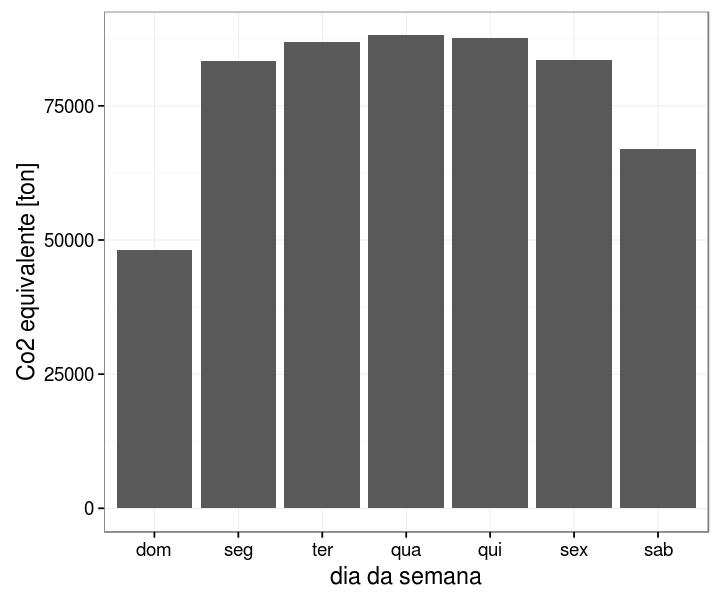

In [60]:
str(dow)
ggplot(dow, aes(diasemana,co2e_ton))+geom_bar(stat="identity")+
xlab("dia da semana") + ylab("Co2 equivalente [ton]")+
theme_bw(base_size=14, base_family="Helvetica")

In [61]:
#por hora do dia
hod <- dbGetQuery(con, "SELECT date_part('hour', datahora_01) hod,
    count(*),
    avg(velocidade) velocidade_media,
    sum(d) km_rodados,
    sum(cons_litros) cons_litros,
    sum(co2e_ton) co2e_ton
FROM pensa_est_ghg.ghg_gps_relatorio
GROUP BY 1
ORDER BY date_part('hour', datahora_01)")

'data.frame':	24 obs. of  6 variables:
 $ hod             : num  0 1 2 3 4 5 6 7 8 9 ...
 $ count           : num  14321209 8154331 6499690 9266887 23712415 ...
 $ velocidade_media: num  27.8 27 26 28.9 30.8 ...
 $ km_rodados      : num  6887553 3829894 2915220 4611024 12672164 ...
 $ cons_litros     : num  2512482 1371137 1023758 1592018 4452075 ...
 $ co2e_ton        : num  6096 3320 2470 3857 10831 ...


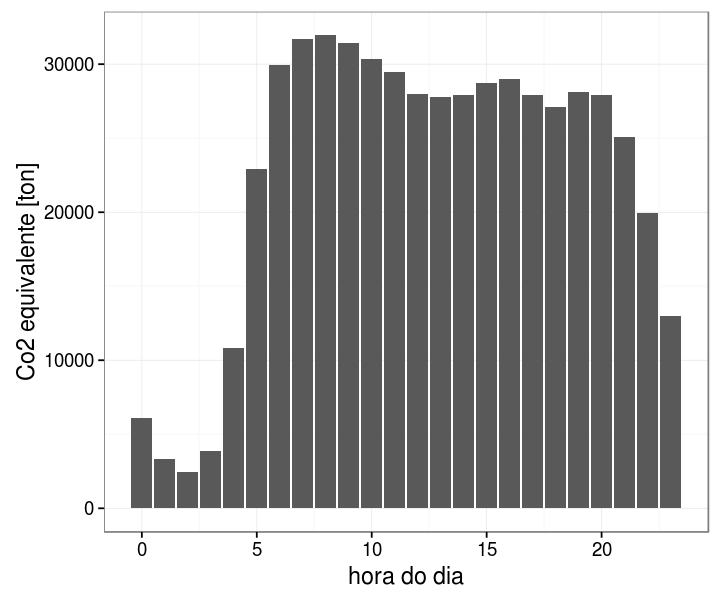

In [62]:
str(hod)
ggplot(hod, aes(hod,co2e_ton))+geom_bar(stat="identity")+
xlab("hora do dia") + ylab("Co2 equivalente [ton]")+
theme_bw(base_size=14, base_family="Helvetica")

In [4]:
#por linha
linha <- dbGetQuery(con, "SELECT DISTINCT ON (t.linha) linha, count(t.*),
    avg(t.velocidade) velocidade_media,
    sum(t.d) km_rodados,
    sum(t.cons_litros) cons_litros,
    sum(t.co2e_ton) co2e_ton
FROM pensa_est_ghg.ghg_gps_relatorio t
WHERE t.linha NOT LIKE '%.0'
GROUP BY 1")

In [5]:
table(linha$linha)


           006 - out                    1                   10 
                   1                    1                    1 
                 100                  101                  102 
                   1                    1                    1 
                 104                  105                  106 
                   1                    1                    1 
                 107                  108                  109 
                   1                    1                    1 
                  11                  110                  111 
                   1                    1                    1 
                 112                  119                   12 
                   1                    1                    1 
                 120                  121                  123 
                   1                    1                    1 
                 124                  125                  126 
                   1                   

In [ ]:
###indicadores de eficiencia####
co2 por km
co2 por passageiros (pegar na SMTR)

In [6]:
#indicacao de linhas biofuel
linha[with(linha, order(-co2e_ton)), ]

linha    count velocidade_media km_rodados cons_litros
527                  864 11708967         25.94963 5384769.95  2063946.66
200                  371 12176148         21.19088 4478586.52  1926292.40
338                  607  9649400         18.02897 3401861.62  1596025.80
363                  636 11345089         17.91638 3504172.75  1592046.78
227                  397  7273200         34.43615 4490619.83  1504635.65
311                  550  9422233         23.19684 3854072.00  1505812.49
354                  624  9163640         21.38375 3391409.88  1460076.70
364                  638  8860067         20.11129 3122444.92  1388948.87
240                  415  9012383         20.91479 3302935.34  1389533.66
191                  363  9145960         19.95494 3191791.98  1389642.38
101                 2336  6681898         36.10469 4346656.32  1369272.14
577                  908  8357705         20.72084 3132454.21  1353410.75
365                  639  8405883         20.71447 3051495.64  1340800.97
587                  918  8525796         20.25179 3009693.16  1314105.89
269                  457  6948050         21.77718 3043676.36  1287084.65
222                  393  6658538         28.70586 3424313.02  1245666.62
280                  474  7861840         21.69650 2986103.14  1234397.85
144                  315  6389604         30.55338 3443787.57  1201544.93
173                  343  6688154         26.93931 3184966.15  1171408.76
320                  565  7206310         24.23345 3079703.91  1171659.90
457                  803  7341799         22.25216 2825528.84  1164532.79
245                  422  7700332         17.39693 2344332.07  1103103.40
359                  629  6752024         20.73981 2465515.17  1080630.31
235                  409  7537096         17.68122 2329186.91  1077557.57
318                  557  6743522         21.94905 2573583.04  1069134.73
237                  410  7158343         18.04022 2307409.44  1059760.42
373                  665  6078501         26.12225 2804630.34  1046435.56
366                  650  5877653         19.51584 2274960.68  1041954.95
525                  862  6486878         23.25448 2597699.41  1037634.70
586                  917  6508144         21.55546 2423302.88  1034435.23
184                  355  6590578         21.44150 2480927.67  1015267.81
127                  298  6153786         20.90863 2305640.64  1001923.74
130                  301  5907298         21.79110 2293931.00   968608.77
331                  600  6063820         20.59670 2192298.19   965217.37
272                  460  5752748         23.56203 2431750.39   953471.42
196                  368  5974670         21.31576 2215585.58   935170.71
253                  435  6245350         18.02870 2057108.80   932999.10
213                  383  5212089         23.24138 2233077.32   928321.13
251                  433  6236064         18.57373 2053752.43   930815.65
267                  455  5783830         22.21252 2283882.06   927896.56
190                  362  5490124         24.29027 2392299.40   918523.23
99                  2335  4436903         32.56271 2614931.30   898316.51
113                  247  6021408         19.19945 2063227.24   902593.00
393                  696  5237829         23.40663 2161751.97   893474.61
179                  350  5586200         21.68182 2145424.19   889518.90
116                  265  5580689         20.17305 1998766.58   868756.42
131                  302  5162964         22.94112 2107440.39   865992.52
455                  801  5406767         20.62244 1967711.84   865593.75
375                  669  5351685         20.23702 1953226.76   860698.30
440                  778  5974789         18.51376 1981426.56   861630.35
212                  382  4686439         27.92477 2286283.13   845501.61
248                  426  5650580         18.59949 1870215.94   847526.05
252                  434  5817171         17.32467 1820376.11   843626.58
111                 238

'data.frame':	741 obs. of  6 variables:
 $ linha           : chr  "006 - out" "1" "10" "100" ...
 $ count           : num  1 1139098 3187861 2241060 216578 ...
 $ velocidade_media: num  19.5 31.8 19.1 20.6 16.9 ...
 $ km_rodados      : num  0.57 621348.31 1067585.23 815780.36 65394.62 ...
 $ cons_litros     : num  0.28 213290.32 445738.76 326527.64 30689.91 ...
 $ co2e_ton        : num  0.0007 519.2169 1073.6661 786.7594 73.9977 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


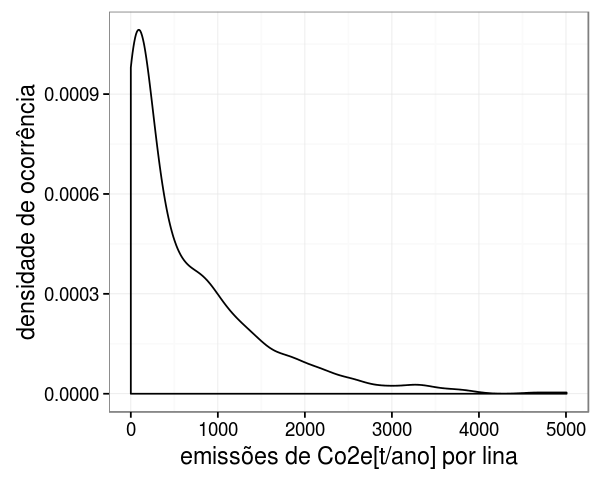

Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'GARAGEM TR�`S AMIGOS' in 'mbcsToSbcs': dot substituted for <ef>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'GARAGEM TR�`S AMIGOS' in 'mbcsToSbcs': dot substituted for <bf>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'GARAGEM TR�`S AMIGOS' in 'mbcsToSbcs': dot substituted for <bd>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'GARAGEM TR�`S AMIGOS' in 'mbcsToSbcs': dot substituted for <ef>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'GARAGEM TR�`S AMIGOS' in 'mbcsToSbcs': dot substituted for <bf>Warning message:
In grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'GARAGEM TR�`S AMIGOS' in 'mbcsToSbcs': dot substi

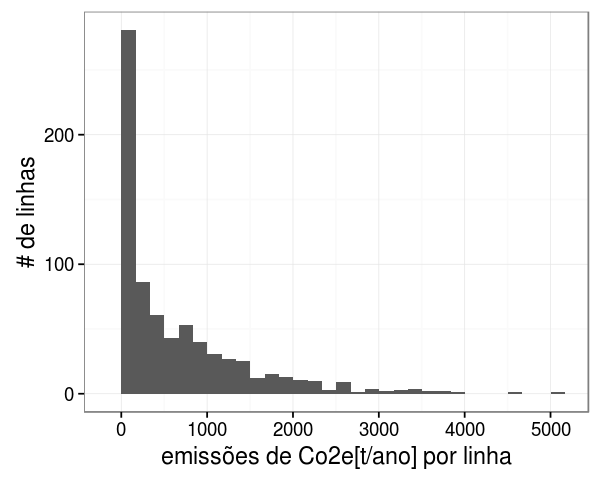

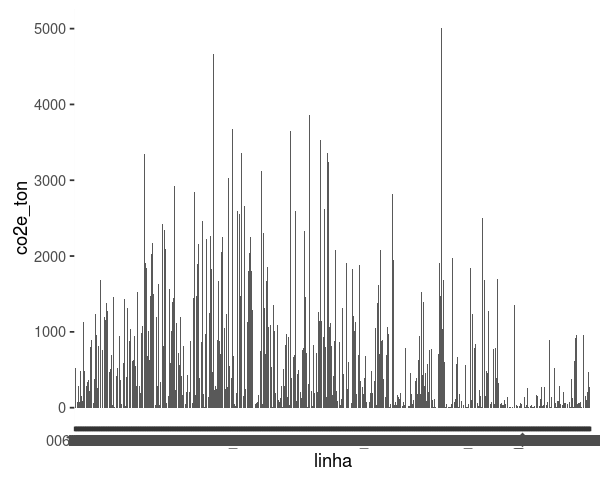

In [16]:
options(repr.plot.width=5, repr.plot.height=4)

str(linha)
ggplot(linha, aes(co2e_ton))+geom_density()+xlab("emissões de Co2e[t/ano] por lina") + ylab("densidade de ocorrência")+
theme_bw(base_size=14, base_family="Helvetica")

ggplot(linha, aes(co2e_ton))+geom_histogram()+xlab("emissões de Co2e[t/ano] por linha") + ylab("# de linhas")+
theme_bw(base_size=14, base_family="Helvetica")


ggplot(linha, aes(linha,co2e_ton))+geom_bar(stat="identity")



'data.frame':	741 obs. of  6 variables:
 $ linha           : chr  "006 - out" "1" "10" "100" ...
 $ count           : num  1 1139098 3187861 2241060 216578 ...
 $ velocidade_media: num  19.5 31.8 19.1 20.6 16.9 ...
 $ km_rodados      : num  0.57 621348.31 1067585.23 815780.36 65394.62 ...
 $ cons_litros     : num  0.28 213290.32 445738.76 326527.64 30689.91 ...
 $ co2e_ton        : num  0.0007 519.2169 1073.6661 786.7594 73.9977 ...


Warning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'GARAGEM TR�`S AMIGOS' in 'mbcsToSbcs': dot substituted for <ef>Warning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'GARAGEM TR�`S AMIGOS' in 'mbcsToSbcs': dot substituted for <bf>Warning message:
In grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, : conversion failure on 'GARAGEM TR�`S AMIGOS' in 'mbcsToSbcs': dot substituted for <bd>

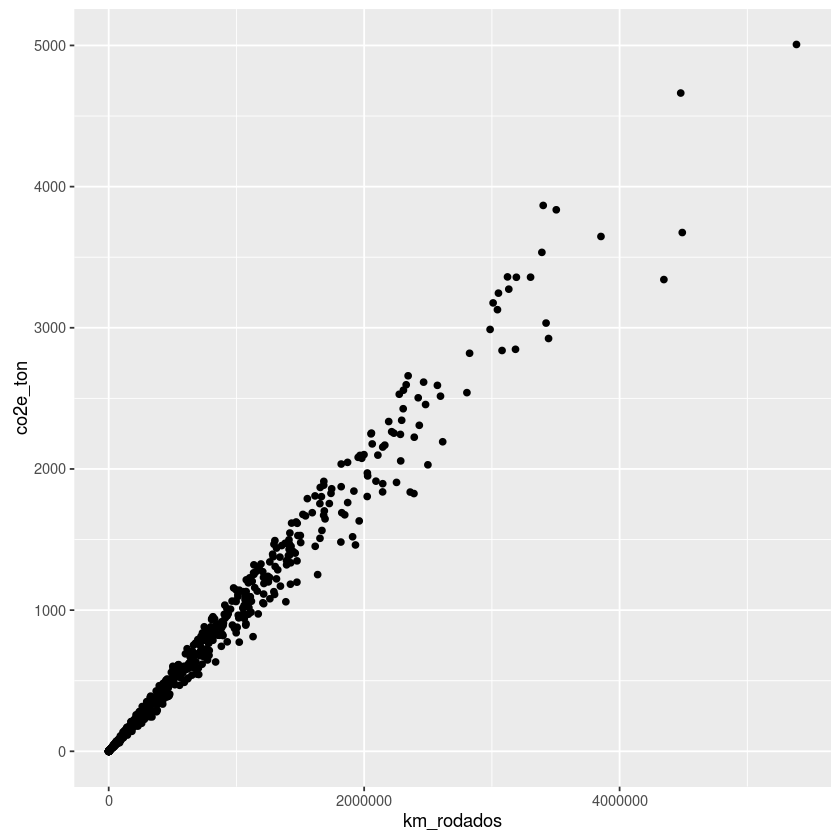

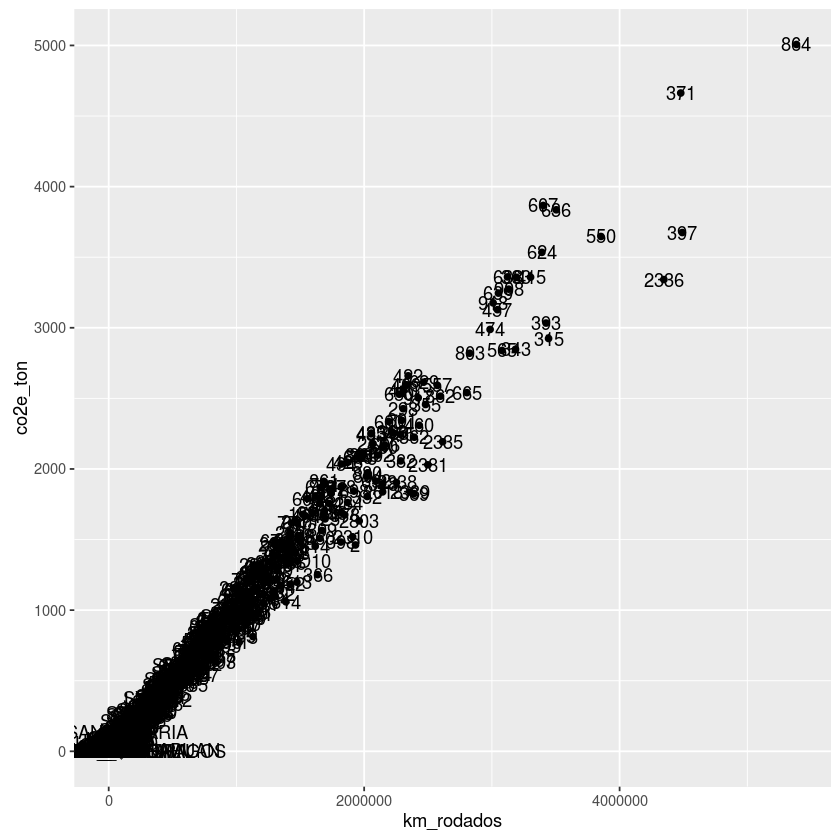

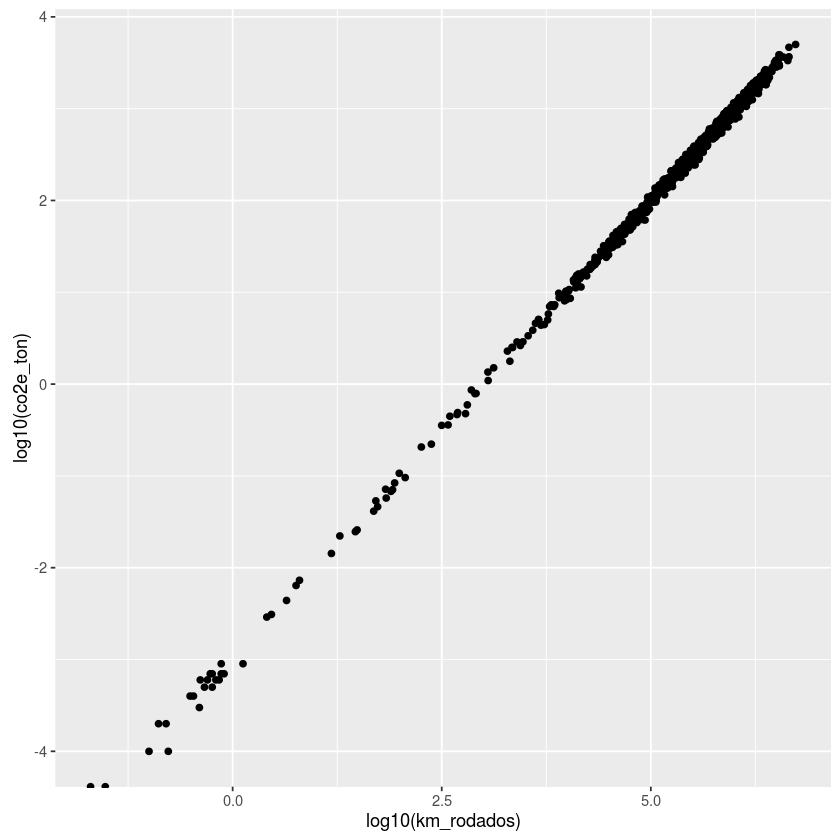

In [8]:
str(linha)
ggplot(linha, aes(km_rodados,co2e_ton, , label = linha))+geom_point()
ggplot(linha, aes(km_rodados,co2e_ton, , label = linha))+geom_point()+ geom_text()
ggplot(linha, aes(log10(km_rodados),log10(co2e_ton)))+geom_point()

In [ ]:
#MAPAS#

In [3]:
pares <- dbGetQuery(con, "SELECT *, ST_X(geo_01) lon_01, ST_Y(geo_01) lat_01,  ST_X(geo_02) lon_02, ST_Y(geo_02) lat_02
                    FROM pensa_est_ghg.ghg_gps 
                    WHERE datahora_01 > '2015-03-01 00:00:00' AND datahora_01 < '2015-03-02 00:00:00' ")



Warning message:
In postgresqlExecStatement(conn, statement, ...): RS-DBI driver warning: (oid: 138520, ntuples: 0)Warning message:
In postgresqlExecStatement(conn, statement, ...): RS-DBI driver warning: (oid: 138520, ntuples: 0)

In [4]:
str(pares)

'data.frame':	2519119 obs. of  20 variables:
 $ id                  : num  149579 160514 194478 200938 206727 ...
 $ linha               : chr  NA "569" "432" "161" ...
 $ ordem_01            : chr  "A27594" "A37659" "A27681" "A37721" ...
 $ datahora_01         : POSIXct, format: "2015-03-01 10:37:42" "2015-03-01 14:50:21" ...
 $ datahora_02         : POSIXct, format: "2015-03-01 10:38:12" "2015-03-01 14:50:51" ...
 $ geo_01              : chr  "0101000020097200008BB2B0D15CB724419C79E2A54F795C41" "010100002009720000C7151E74A4DC2441ECA39E91E3745C41" "010100002009720000FCF26C4A81E524414E03063134725C41" "01010000200972000079146DE3D6E72441D8D17D4E487B5C41" ...
 $ geo_02              : chr  "010100002009720000F8BCE8475FB72441A36AF3A44F795C41" "010100002009720000BD546C099BDD24413ADA19EFE5745C41" "01010000200972000097938802B8E42441CEF6872D31725C41" "0101000020097200000FF31A6DD4E7244148FD744F487B5C41" ...
 $ delta_t             : chr  "00:00:30" "00:00:30" "00:00:30" "00:01:00" ...
 $ distanci

In [5]:
max(pares$lon_01)
min(pares$lon_01)

max(pares$lat_02)
min(pares$lat_02)

[1] 695147.9

[1] 631027.6

[1] 7483613

[1] 7446412

In [ ]:
#ggmap(rio) + stat_density2d(data=waze, mapping=aes(x=waze$longitude, y=waze$latitude, fill=..level.., alpha=..level..), geom="polygon", size=0.01)+ scale_fill_gradient(low = "green", high = "red")+ scale_alpha(range = c(0.05, 0.3), guide = FALSE)+ ggtitle("27/04/2015")

ggplot(pares, aes(x=pares$lon_01, y=pares$lat_01))+geom_point()

#ggplot() + stat_density2d(data=pares, mapping=aes(x=pares$lon_01, y=pares$lat_01, fill=..level.., alpha=..level..), geom="polygon", size=0.01)+ 
#    scale_fill_gradient(low = "green", high = "red")+ 
#    scale_alpha(range = c(0.05, 0.3), guide = FALSE)+ ggtitle("27/04/2015")
